The aim of this notebook is to try out basic FAISS operations: setting up
the index, clustering and sampling from the clusters.

In [1]:
import faiss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_VECTORS = 20
VECTOR_DIM = 2
NUM_CLUSTERS = 3

random_vectors = np.random.rand(NUM_VECTORS, VECTOR_DIM).astype(np.float32)

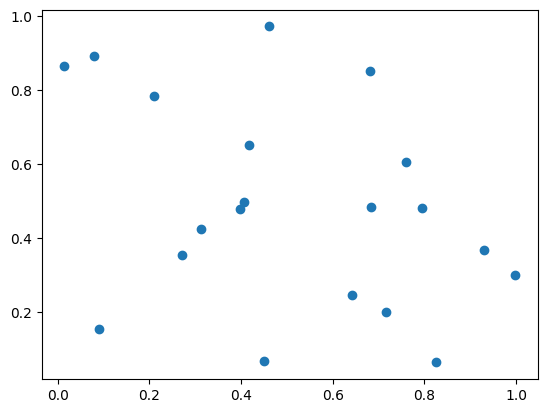

In [3]:
plt.scatter(random_vectors[:, 0], random_vectors[:, 1])
plt.show()

In [4]:
index = faiss.IndexFlatL2(VECTOR_DIM)

index.train(random_vectors)
index.add(random_vectors)

In [5]:
kmeans = faiss.Kmeans(d=VECTOR_DIM, k=NUM_CLUSTERS, niter=20, verbose=False)
kmeans.train(random_vectors)

# Assign vectors to clusters
cluster_assignments = kmeans.index.search(random_vectors, 1)[1].flatten()

np.save('cluster_assignments.npy', cluster_assignments)

WARNING clustering 20 points to 3 centroids: please provide at least 117 training points


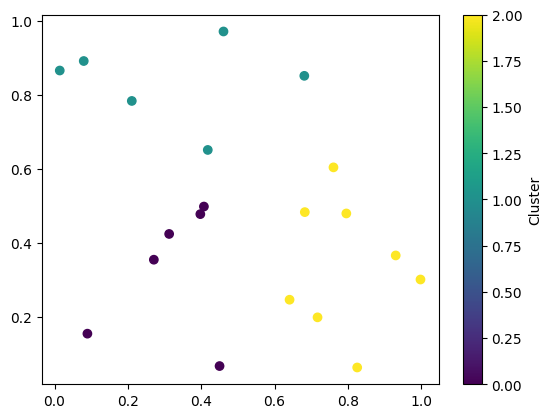

In [6]:
cluster_assignments = np.load('cluster_assignments.npy')

plt.scatter(random_vectors[:, 0], random_vectors[:, 1], c=cluster_assignments, cmap='viridis')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
# Sample vector `v1`, find its cluster and sample another vector `v2` from the cluster
v1 = np.random.rand(1, VECTOR_DIM).astype(np.float32)
cluster_id = kmeans.index.search(v1, 1)[1].flatten()
cluster_vectors = random_vectors[cluster_assignments == cluster_id]
v2 = cluster_vectors[np.random.choice(cluster_vectors.shape[0])]

print('cluster ID:', cluster_id[0])
print('v1:', v1[0])
print('v2:', v2)

cluster ID: 0
v1: [0.1108537 0.4709029]
v2: [0.44995502 0.06757946]


In [8]:
! rm cluster_assignments.npy